In [2]:
# install fredapi, plotly
%pip install fredapi plotly --quiet 



[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px 

# set up style for plt
plt.style.use('fivethirtyeight')

# set max column to 500
pd.options.display.max_columns = 500


# add a color pallete
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']

# import fredapi 
from fredapi import Fred 

# set env requirements
from dotenv import find_dotenv, load_dotenv
import os 

load_dotenv(find_dotenv())

# set secret key
FRED_API_KEY = os.getenv('FRED_API_KEY')




## Step 1. Creaete Fred Object and Search for Sample Dataset

In [4]:
# create fred object
fred = Fred(api_key=FRED_API_KEY)

# search for a sample dataset
fred.search('S&P')

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
SP500,SP500,2023-02-02,2023-02-02,S&P 500,2013-02-04,2023-02-02,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-02-02 19:10:58-06:00,84,The observations for the S&P 500 represent the...
VXVCLS,VXVCLS,2023-02-02,2023-02-02,CBOE S&P 500 3-Month Volatility Index,2007-12-04,2023-02-01,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-02-02 08:36:10-06:00,55,"Copyright, 2016, Chicago Board Options Exchang..."
VXOCLS,VXOCLS,2023-02-02,2023-02-02,CBOE S&P 100 Volatility Index: VXO (DISCONTINUED),1986-01-02,2021-09-23,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2021-09-24 08:36:03-05:00,38,This series is no longer being updated by the ...
CSUSHPINSA,CSUSHPINSA,2023-02-02,2023-02-02,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2022-11-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-01-31 08:01:02-06:00,91,"For more information regarding the index, plea..."
CSUSHPISA,CSUSHPISA,2023-02-02,2023-02-02,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2022-11-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Seasonally Adjusted,SA,2023-01-31 08:01:04-06:00,84,"For more information regarding the index, plea..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MEHOINUSSDA646N,MEHOINUSSDA646N,2023-02-02,2023-02-02,Median Household Income in South Dakota,1984-01-01,2021-01-01,Annual,A,Current Dollars,Current $,Not Seasonally Adjusted,NSA,2022-09-13 13:48:27-05:00,3,Household data are collected as of March. As ...
EMPENGINA148NRUG,EMPENGINA148NRUG,2023-02-02,2023-02-02,Number of Persons Engaged for India,1950-01-01,2019-01-01,Annual,A,Millions of Persons,Mil. of Persons,Not Seasonally Adjusted,NSA,2021-01-21 13:29:55-06:00,3,Source ID: emp When using these data in your ...
XRNCUSMYA618NRUG,XRNCUSMYA618NRUG,2023-02-02,2023-02-02,Exchange Rate (market+estimated) for Malaysia,1955-01-01,2019-01-01,Annual,A,National Currency Units per US Dollar,National Currency Units per US $,Not Seasonally Adjusted,NSA,2021-01-21 13:29:40-06:00,3,Source ID: xr When using these data in your r...


In [5]:
# customize the search option
sp_search = fred.search('S&P', order_by='popularity', sort_order='desc')

sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2023-02-02,2023-02-02,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2023-02-01,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-02-02 09:07:15-06:00,94,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2023-02-02,2023-02-02,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2022-11-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-01-31 08:01:02-06:00,91,"For more information regarding the index, plea..."
SP500,SP500,2023-02-02,2023-02-02,S&P 500,2013-02-04,2023-02-02,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-02-02 19:10:58-06:00,84,The observations for the S&P 500 represent the...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2023-02-02,2023-02-02,ICE BofA US High Yield Index Effective Yield,1996-12-31,2023-02-01,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-02-02 09:07:14-06:00,84,This data represents the effective yield of th...
CSUSHPISA,CSUSHPISA,2023-02-02,2023-02-02,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2022-11-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Seasonally Adjusted,SA,2023-01-31 08:01:04-06:00,84,"For more information regarding the index, plea..."


## Step 2. Download the Raw Data


In [6]:
# get data series with id 'SP500'
fred.get_series(series_id='SP500')

2013-02-04    1495.71
2013-02-05    1511.29
2013-02-06    1512.12
2013-02-07    1509.39
2013-02-08    1517.93
               ...   
2023-01-27    4070.56
2023-01-30    4017.77
2023-01-31    4076.60
2023-02-01    4119.21
2023-02-02    4179.76
Length: 2609, dtype: float64

## Step 3. Plot the Series

<AxesSubplot:>

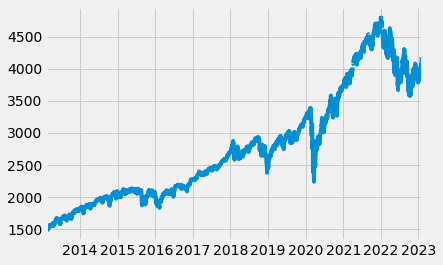

In [7]:
sp500 = fred.get_series(series_id='SP500')

sp500.plot()

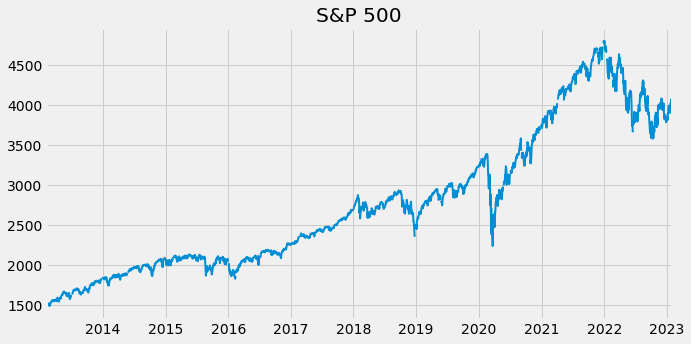

In [8]:
# style the plot
sp500.plot(figsize=(10,5),
            title='S&P 500',
            lw=2
)

plt.show()

## Step 4. Join Multiple Data Series

### Task: Find Unemployment Data

In [9]:
fred.search('unemployment')

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-02-02,2023-02-02,Unemployment Rate,1948-01-01,2022-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-01-06 07:43:03-06:00,94,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2023-02-02,2023-02-02,Unemployment Rate,1948-01-01,2022-12-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-01-06 07:43:28-06:00,56,The unemployment rate represents the number of...
NROU,NROU,2023-02-02,2023-02-02,Noncyclical Rate of Unemployment,1949-01-01,2032-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2022-05-26 13:45:04-05:00,67,"Starting with the July, 2021 report: An Update..."
UNEMPLOY,UNEMPLOY,2023-02-02,2023-02-02,Unemployment Level,1948-01-01,2022-12-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2023-01-06 07:43:24-06:00,69,The series comes from the 'Current Population ...
CCSA,CCSA,2023-02-02,2023-02-02,Continued Claims (Insured Unemployment),1967-01-07,2023-01-21,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2023-02-02 11:36:03-06:00,72,"Continued claims, also referred to as insured ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LAUCN121270000000003A,LAUCN121270000000003A,2023-02-02,2023-02-02,"Unemployment Rate in Volusia County, FL",1990-01-01,2021-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2022-04-27 10:56:59-05:00,1,These data come from the Current Population Su...
LAUCN450830000000003A,LAUCN450830000000003A,2023-02-02,2023-02-02,"Unemployment Rate in Spartanburg County, SC",1990-01-01,2021-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2022-04-27 10:51:05-05:00,1,These data come from the Current Population Su...
LNS13026637,LNS13026637,2023-02-02,2023-02-02,Unemployment Level - Persons Who Completed Tem...,1994-01-01,2022-12-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2023-01-06 07:45:09-06:00,10,The series comes from the 'Current Population ...


In [10]:
# explore sample data - ie 'UNRATE' series that is seasonally-adjusted & monthly
fred.get_series(series_id='UNRATE')

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2022-08-01    3.7
2022-09-01    3.5
2022-10-01    3.7
2022-11-01    3.6
2022-12-01    3.5
Length: 900, dtype: float64

<AxesSubplot:>

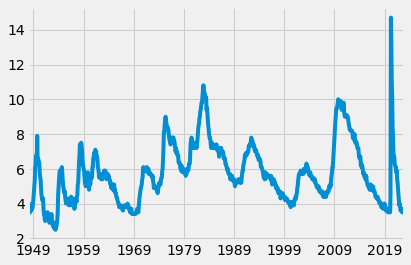

In [11]:
# plot the UNRATE series
unemp_rate = fred.get_series(series_id='UNRATE')
unemp_rate.plot()

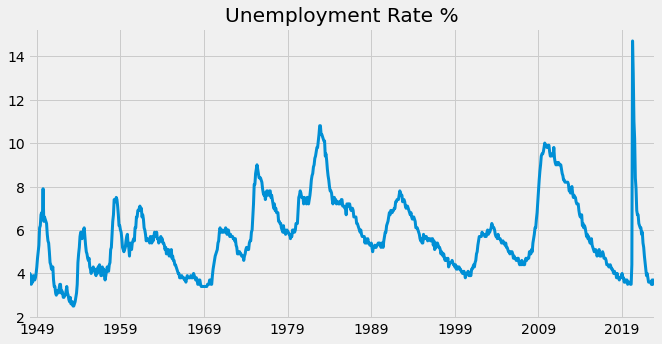

In [12]:
# style plot
unemp_rate.plot(figsize=(10,5),
                title='Unemployment Rate %',
                lw=3)
plt.show()

### Task: Search for State-Specific Unemployment Data - i.e., Texas

In [13]:
# further narrow the search to Monthly data
fred.search('unemployment state texas', filter=('frequency', 'Monthly'))

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
TXUR,TXUR,2023-02-02,2023-02-02,Unemployment Rate in Texas,1976-01-01,2022-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-01-25 08:26:03-06:00,49,None
TXURN,TXURN,2023-02-02,2023-02-02,Unemployment Rate in Texas,1976-01-01,2022-12-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-01-25 08:26:21-06:00,13,None
AUST448URN,AUST448URN,2023-02-02,2023-02-02,"Unemployment Rate in Austin-Round Rock, TX (MSA)",1990-01-01,2022-12-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-02-01 10:07:02-06:00,30,None
DALL148URN,DALL148URN,2023-02-02,2023-02-02,Unemployment Rate in Dallas-Fort Worth-Arlingt...,1990-01-01,2022-12-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-02-01 10:07:03-06:00,28,None
AUST448UR,AUST448UR,2023-02-02,2023-02-02,"Unemployment Rate in Austin-Round Rock, TX (MSA)",1990-01-01,2022-12-01,Monthly,M,Percent,%,Smoothed Seasonally Adjusted,SSA,2023-02-01 13:31:14-06:00,5,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LAUCN481430000000005,LAUCN481430000000005,2023-02-02,2023-02-02,"Employed Persons in Erath County, TX",1990-01-01,2022-12-01,Monthly,M,Persons,Persons,Not Seasonally Adjusted,NSA,2023-02-01 10:16:56-06:00,1,These data come from the Current Population Su...
LAUCN484410000000005,LAUCN484410000000005,2023-02-02,2023-02-02,"Employed Persons in Taylor County, TX",1990-01-01,2022-12-01,Monthly,M,Persons,Persons,Not Seasonally Adjusted,NSA,2023-02-01 10:14:24-06:00,1,These data come from the Current Population Su...
LAUCN480590000000005,LAUCN480590000000005,2023-02-02,2023-02-02,"Employed Persons in Callahan County, TX",1990-01-01,2022-12-01,Monthly,M,Persons,Persons,Not Seasonally Adjusted,NSA,2023-02-01 10:16:18-06:00,1,These data come from the Current Population Su...


### Task: Create a DF Consisting of Monthly Unemployment Data for States

In [14]:
unemp_df = fred.search('unemployment rate state').query('frequency == "Monthly" and units == "Percent" and \
                                            seasonal_adjustment == "Seasonally Adjusted"')

unemp_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-02-02,2023-02-02,Unemployment Rate,1948-01-01,2022-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-01-06 07:43:03-06:00,94,The unemployment rate represents the number of...
U6RATE,U6RATE,2023-02-02,2023-02-02,"Total Unemployed, Plus All Persons Marginally ...",1994-01-01,2022-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-01-06 07:43:25-06:00,66,The series comes from the 'Current Population ...
LNS14000006,LNS14000006,2023-02-02,2023-02-02,Unemployment Rate - Black or African American,1972-01-01,2022-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-01-06 07:43:26-06:00,64,The series comes from the 'Current Population ...
CAUR,CAUR,2023-02-02,2023-02-02,Unemployment Rate in California,1976-01-01,2022-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-01-25 08:27:02-06:00,57,None
M0892AUSM156SNBR,M0892AUSM156SNBR,2023-02-02,2023-02-02,Unemployment Rate for United States,1929-04-01,1942-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:26:06-05:00,53,Series Is Presented Here As Three Variables--(...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LNS14000093,LNS14000093,2023-02-02,2023-02-02,Unemployment Rate - 45-54 Yrs.,1948-01-01,2022-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-01-06 07:45:02-06:00,8,The series comes from the 'Current Population ...
LNS14000025,LNS14000025,2023-02-02,2023-02-02,"Unemployment Rate - 20 Yrs. & over, Men",1948-01-01,2022-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-01-06 07:44:55-06:00,7,The series comes from the 'Current Population ...
CWSTUR,CWSTUR,2023-02-02,2023-02-02,Unemployment Rate in West Census Region,1976-01-01,2022-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-01-25 08:26:25-06:00,7,None


In [15]:
# explore the title
unemp_df['title']

series id
UNRATE                                              Unemployment Rate
U6RATE              Total Unemployed, Plus All Persons Marginally ...
LNS14000006             Unemployment Rate - Black or African American
CAUR                                  Unemployment Rate in California
M0892AUSM156SNBR                  Unemployment Rate for United States
                                          ...                        
LNS14000093                            Unemployment Rate - 45-54 Yrs.
LNS14000025                   Unemployment Rate - 20 Yrs. & over, Men
CWSTUR                        Unemployment Rate in West Census Region
CNEWUR               Unemployment Rate in New England Census Division
USAURAMS            Unemployment Rate in the United States (DISCON...
Name: title, Length: 146, dtype: object

In [16]:
# filter the df to inlclude only series that contain 'Unemployment Rate' 
unemp_df['title'].str.contains('Unemployment Rate')

series id
UNRATE               True
U6RATE              False
LNS14000006          True
CAUR                 True
M0892AUSM156SNBR     True
                    ...  
LNS14000093          True
LNS14000025          True
CWSTUR               True
CNEWUR               True
USAURAMS             True
Name: title, Length: 146, dtype: bool

In [17]:
# overwrite the df with new filter option
unemp_df = unemp_df.query('title.str.contains("Unemployment Rate")')
unemp_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-02-02,2023-02-02,Unemployment Rate,1948-01-01,2022-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-01-06 07:43:03-06:00,94,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2023-02-02,2023-02-02,Unemployment Rate - Black or African American,1972-01-01,2022-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-01-06 07:43:26-06:00,64,The series comes from the 'Current Population ...
CAUR,CAUR,2023-02-02,2023-02-02,Unemployment Rate in California,1976-01-01,2022-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-01-25 08:27:02-06:00,57,None
M0892AUSM156SNBR,M0892AUSM156SNBR,2023-02-02,2023-02-02,Unemployment Rate for United States,1929-04-01,1942-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:26:06-05:00,53,Series Is Presented Here As Three Variables--(...
M0892BUSM156SNBR,M0892BUSM156SNBR,2023-02-02,2023-02-02,Unemployment Rate for United States,1940-01-01,1946-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:29:19-05:00,18,Series Is Presented Here As Three Variables--(...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LNS14000093,LNS14000093,2023-02-02,2023-02-02,Unemployment Rate - 45-54 Yrs.,1948-01-01,2022-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-01-06 07:45:02-06:00,8,The series comes from the 'Current Population ...
LNS14000025,LNS14000025,2023-02-02,2023-02-02,"Unemployment Rate - 20 Yrs. & over, Men",1948-01-01,2022-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-01-06 07:44:55-06:00,7,The series comes from the 'Current Population ...
CWSTUR,CWSTUR,2023-02-02,2023-02-02,Unemployment Rate in West Census Region,1976-01-01,2022-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-01-25 08:26:25-06:00,7,None


In [18]:
unemp_df[['id', 'title']].head(20)

,id,title
series id,,
UNRATE,UNRATE,Unemployment Rate
LNS14000006,LNS14000006,Unemployment Rate - Black or African American
CAUR,CAUR,Unemployment Rate in California
M0892AUSM156SNBR,M0892AUSM156SNBR,Unemployment Rate for United States
M0892BUSM156SNBR,M0892BUSM156SNBR,Unemployment Rate for United States
LNS14000031,LNS14000031,"Unemployment Rate - 20 Yrs. & over, Black or A..."
FLUR,FLUR,Unemployment Rate in Florida
LNS14000024,LNS14000024,Unemployment Rate - 20 Yrs. & over
U2RATE,U2RATE,Unemployment Rate - Job Losers (U-2)


### Based on id description, it seems that state-specific series follow this naming convention: 
- `state abbreviation + UR` - i.e., TXUR for Texas

In [19]:
# filter titles based on index name length being 4 characters long
unemp_df.query('index.str.len() == 4')

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CAUR,CAUR,2023-02-02,2023-02-02,Unemployment Rate in California,1976-01-01,2022-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-01-25 08:27:02-06:00,57,None
FLUR,FLUR,2023-02-02,2023-02-02,Unemployment Rate in Florida,1976-01-01,2022-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-01-25 08:27:02-06:00,50,None
TXUR,TXUR,2023-02-02,2023-02-02,Unemployment Rate in Texas,1976-01-01,2022-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-01-25 08:26:03-06:00,49,None
NYUR,NYUR,2023-02-02,2023-02-02,Unemployment Rate in New York,1976-01-01,2022-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-01-25 08:26:02-06:00,48,None
OHUR,OHUR,2023-02-02,2023-02-02,Unemployment Rate in Ohio,1976-01-01,2022-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-01-25 08:26:04-06:00,40,None
MIUR,MIUR,2023-02-02,2023-02-02,Unemployment Rate in Michigan,1976-01-01,2022-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-01-25 08:27:02-06:00,34,None
PAUR,PAUR,2023-02-02,2023-02-02,Unemployment Rate in Pennsylvania,1976-01-01,2022-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-01-25 08:26:04-06:00,36,None
NCUR,NCUR,2023-02-02,2023-02-02,Unemployment Rate in North Carolina,1976-01-01,2022-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-01-25 08:26:10-06:00,27,None
NJUR,NJUR,2023-02-02,2023-02-02,Unemployment Rate in New Jersey,1976-01-01,2022-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-01-25 08:26:13-06:00,21,None


In [20]:
# the Dataframe is indexed based on the Series Id value, which we need to pass 
# into fred.get_series() under `series_id` argument 
# as done earlier for unemp_rate

for sid in unemp_df.index:
    if len(sid) == 4:
        state_data = fred.get_series(series_id=sid)
        break # only retrieve the first series for testing purposes

# check the result
state_data


1976-01-01    9.2
1976-02-01    9.2
1976-03-01    9.1
1976-04-01    9.1
1976-05-01    9.0
             ... 
2022-08-01    4.1
2022-09-01    3.8
2022-10-01    4.0
2022-11-01    4.1
2022-12-01    4.1
Length: 564, dtype: float64

In [21]:
# convert the result to a df
state_data.to_frame()

,0
1976-01-01,9.2
1976-02-01,9.2
1976-03-01,9.1
1976-04-01,9.1
1976-05-01,9.0
...,...
2022-08-01,4.1
2022-09-01,3.8
2022-10-01,4.0
2022-11-01,4.1


In [22]:
# pass in the optional name parameter 
# remember that sid object is pointing to the index name
state_data.to_frame(name=sid)

,CAUR
1976-01-01,9.2
1976-02-01,9.2
1976-03-01,9.1
1976-04-01,9.1
1976-05-01,9.0
...,...
2022-08-01,4.1
2022-09-01,3.8
2022-10-01,4.0
2022-11-01,4.1


In [23]:
# initiate an empty list to append all state-specific series
states_unemp_data = []

# apply the above logic in a try-except block

try:
    for sid in unemp_df.index:
        if len(sid) == 4:
            state_data = fred.get_series(series_id=sid)
            state_data = state_data.to_frame(name=sid)
            states_unemp_data.append(state_data)
except Exception as e:
    print(e)
else:
    print('Data is ready!')

Data is ready!


In [24]:
# remember that data is in a list
type(states_unemp_data)

list

In [25]:
# check the number of dfs inside the list
len(states_unemp_data)

52

In [26]:
# each state-specif df is accessible via index location
states_unemp_data[0]

,CAUR
1976-01-01,9.2
1976-02-01,9.2
1976-03-01,9.1
1976-04-01,9.1
1976-05-01,9.0
...,...
2022-08-01,4.1
2022-09-01,3.8
2022-10-01,4.0
2022-11-01,4.1


In [27]:
# concatenate the data based on column
# for series that do not have data with matching date, NaN will be inserted
pd.concat(states_unemp_data, axis=1)

,CAUR,FLUR,TXUR,NYUR,OHUR,MIUR,PAUR,NCUR,NJUR,ILUR,ALUR,MNUR,MOUR,WIUR,GAUR,KYUR,MAUR,COUR,TNUR,VAUR,WAUR,WVUR,AZUR,INUR,ORUR,IAUR,ARUR,NVUR,OKUR,UTUR,MDUR,SCUR,AKUR,LAUR,NMUR,MTUR,DCUR,KSUR,PRUR,MSUR,WYUR,HIUR,IDUR,NDUR,NEUR,RIUR,SDUR,MEUR,CTUR,NHUR,VTUR,DEUR
1976-01-01,9.2,9.7,5.8,10.3,8.1,9.9,8.0,6.4,10.3,6.6,6.6,6.0,5.9,5.8,8.4,5.6,10.5,5.8,6.0,6.1,8.5,7.5,10.2,6.6,9.5,4.3,7.3,9.2,5.8,5.8,6.4,7.4,7.1,6.3,8.6,5.8,8.7,4.2,19.6,6.7,4.1,9.8,5.6,3.4,3.3,7.8,3.3,8.7,9.8,6.5,8.6,8.0
1976-02-01,9.2,9.7,5.8,10.3,8.1,9.9,8.1,6.4,10.3,6.6,6.6,6.0,5.9,5.8,8.4,5.6,10.5,5.7,6.0,6.1,8.5,7.5,10.2,6.6,9.5,4.3,7.3,9.2,5.8,5.9,6.4,7.4,7.1,6.3,8.7,5.8,8.7,4.2,19.5,6.7,4.1,9.8,5.6,3.4,3.3,7.8,3.3,8.7,9.8,6.5,8.6,8.0
1976-03-01,9.1,9.6,5.9,10.2,8.1,9.9,8.1,6.4,10.3,6.6,6.6,5.9,5.9,5.7,8.4,5.6,10.5,5.7,6.0,6.1,8.4,7.5,10.1,6.5,9.4,4.3,7.3,9.2,5.8,5.8,6.4,7.3,7.0,6.3,8.7,5.8,8.6,4.2,19.3,6.6,4.1,9.8,5.6,3.4,3.3,7.7,3.2,8.6,9.8,6.5,8.6,8.0
1976-04-01,9.1,9.5,5.9,10.2,8.0,9.8,8.1,6.3,10.3,6.6,6.5,5.8,6.0,5.6,8.3,5.6,10.3,5.6,6.0,6.0,8.5,7.5,10.0,6.3,9.2,4.2,7.2,9.0,5.8,5.8,6.4,7.2,6.9,6.4,8.6,5.8,8.5,4.2,19.0,6.4,4.0,9.7,5.6,3.5,3.2,7.7,3.1,8.6,9.6,6.5,8.6,8.1
1976-05-01,9.0,9.3,5.9,10.1,7.8,9.6,8.1,6.1,10.3,6.6,6.4,5.7,6.0,5.5,8.1,5.5,10.1,5.6,5.9,5.9,8.5,7.4,9.8,6.0,9.1,4.1,7.1,8.9,5.7,5.7,6.5,7.0,6.9,6.5,8.6,5.8,8.4,4.2,18.9,6.3,3.9,9.4,5.6,3.6,3.1,7.7,3.1,8.5,9.4,6.5,8.5,8.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,4.1,2.7,4.1,4.7,4.0,4.1,4.2,3.5,4.0,4.5,2.6,1.9,2.5,3.1,2.8,3.8,3.6,3.4,3.4,2.6,3.7,3.9,3.5,2.8,3.7,2.6,3.4,4.4,3.1,2.0,4.3,3.1,4.6,3.5,4.4,2.8,5.1,2.5,5.8,3.6,3.1,4.0,2.7,2.3,2.1,2.8,2.3,3.1,4.1,2.0,2.1,4.5
2022-09-01,3.8,2.5,4.0,4.3,4.0,4.1,4.1,3.6,3.3,4.5,2.6,2.0,2.4,3.2,2.8,3.8,3.4,3.4,3.4,2.6,3.7,4.0,3.7,2.8,3.8,2.7,3.5,4.4,3.2,2.1,4.0,3.2,4.4,3.4,4.2,2.9,4.7,2.6,NaN,3.6,3.3,3.5,2.8,2.2,2.2,3.1,2.3,3.3,4.0,2.2,2.1,4.3
2022-10-01,4.0,2.7,4.0,4.3,4.2,4.2,4.0,3.8,3.4,4.6,2.7,2.1,2.6,3.3,2.9,3.9,3.5,3.6,3.5,2.7,3.8,4.0,3.9,3.0,4.1,2.9,3.6,4.6,3.4,2.1,4.5,3.3,4.5,3.3,4.3,3.0,4.8,2.8,NaN,3.8,3.5,3.3,2.9,2.3,2.4,3.4,2.4,3.6,4.3,2.4,2.3,4.3
2022-11-01,4.1,2.6,4.0,4.3,4.2,4.3,4.0,3.9,3.4,4.7,2.7,2.3,2.7,3.3,3.0,4.0,3.4,3.5,3.5,2.8,4.0,4.1,4.1,3.0,4.3,3.1,3.7,4.9,3.4,2.2,4.3,3.3,4.5,3.3,4.1,2.9,4.6,2.8,NaN,3.9,3.6,3.3,3.0,2.3,2.5,3.6,2.4,3.7,4.2,2.6,2.5,4.4


In [28]:
# save the concatenated data to a df
states_unemp_df = pd.concat(states_unemp_data, axis=1)

# check the shape of the joined df
states_unemp_df.shape

(564, 52)

In [29]:
# check for total count missing values row-wise - if any
states_unemp_df.isna().sum().sum()


6

In [30]:
# check for missing values column wise
states_unemp_df.isna().sum(axis=1)

1976-01-01    0
1976-02-01    0
1976-03-01    0
1976-04-01    0
1976-05-01    0
             ..
2022-08-01    0
2022-09-01    1
2022-10-01    1
2022-11-01    1
2022-12-01    1
Freq: MS, Length: 564, dtype: int64

In [31]:
# find out which columns contain null values

# initiate an empty list to hold null columns
null_colums = []

for state_name in states_unemp_df.columns:
    # if the column has any null values, append it to the null_columns
    if states_unemp_df[state_name].isna().values.any() == True:
        null_colums.append(state_name)

null_colums


['PRUR']

In [32]:
# furter explore the null values under 'PRUR' column

states_unemp_df.loc[states_unemp_df['PRUR'].isna()]

,CAUR,FLUR,TXUR,NYUR,OHUR,MIUR,PAUR,NCUR,NJUR,ILUR,ALUR,MNUR,MOUR,WIUR,GAUR,KYUR,MAUR,COUR,TNUR,VAUR,WAUR,WVUR,AZUR,INUR,ORUR,IAUR,ARUR,NVUR,OKUR,UTUR,MDUR,SCUR,AKUR,LAUR,NMUR,MTUR,DCUR,KSUR,PRUR,MSUR,WYUR,HIUR,IDUR,NDUR,NEUR,RIUR,SDUR,MEUR,CTUR,NHUR,VTUR,DEUR
2020-03-01,5.5,4.5,5.1,3.9,4.8,3.8,5.2,3.9,3.3,4.9,3.6,4.0,3.5,2.9,3.7,4.1,2.9,4.8,3.6,2.9,5.3,5.2,5.1,3.5,3.5,2.6,4.9,8.0,3.2,2.5,4.2,3.0,5.2,6.8,6.1,3.6,5.5,3.1,NaN,5.8,5.2,2.2,2.8,2.5,4.3,3.6,2.5,2.7,3.4,2.6,2.7,5.0
2020-04-01,15.9,13.2,12.6,16.2,16.4,22.7,16.5,14.2,15.5,17.4,13.7,9.0,11.2,14.1,12.3,16.5,17.1,11.6,15.9,11.6,16.8,15.5,13.9,16.8,13.3,10.5,10.0,28.5,12.6,10.0,9.5,11.6,11.9,13.5,9.5,12.2,11.1,12.2,NaN,15.4,5.4,22.4,11.8,8.3,8.2,18.4,8.8,9.1,8.0,16.2,14.3,13.1
2022-09-01,3.8,2.5,4.0,4.3,4.0,4.1,4.1,3.6,3.3,4.5,2.6,2.0,2.4,3.2,2.8,3.8,3.4,3.4,3.4,2.6,3.7,4.0,3.7,2.8,3.8,2.7,3.5,4.4,3.2,2.1,4.0,3.2,4.4,3.4,4.2,2.9,4.7,2.6,NaN,3.6,3.3,3.5,2.8,2.2,2.2,3.1,2.3,3.3,4.0,2.2,2.1,4.3
2022-10-01,4.0,2.7,4.0,4.3,4.2,4.2,4.0,3.8,3.4,4.6,2.7,2.1,2.6,3.3,2.9,3.9,3.5,3.6,3.5,2.7,3.8,4.0,3.9,3.0,4.1,2.9,3.6,4.6,3.4,2.1,4.5,3.3,4.5,3.3,4.3,3.0,4.8,2.8,NaN,3.8,3.5,3.3,2.9,2.3,2.4,3.4,2.4,3.6,4.3,2.4,2.3,4.3
2022-11-01,4.1,2.6,4.0,4.3,4.2,4.3,4.0,3.9,3.4,4.7,2.7,2.3,2.7,3.3,3.0,4.0,3.4,3.5,3.5,2.8,4.0,4.1,4.1,3.0,4.3,3.1,3.7,4.9,3.4,2.2,4.3,3.3,4.5,3.3,4.1,2.9,4.6,2.8,NaN,3.9,3.6,3.3,3.0,2.3,2.5,3.6,2.4,3.7,4.2,2.6,2.5,4.4
2022-12-01,4.1,2.5,3.9,4.3,4.2,4.3,3.9,3.9,3.4,4.7,2.8,2.5,2.8,3.2,3.0,4.0,3.3,3.3,3.5,3.0,4.2,4.1,4.0,3.1,4.5,3.1,3.6,5.2,3.4,2.2,4.0,3.3,4.3,3.5,3.9,2.8,4.7,2.9,NaN,4.0,3.7,3.2,2.9,2.3,2.6,3.5,2.3,3.8,4.2,2.7,2.6,4.4


In [33]:
# filter down to Puerto Rico column 
states_unemp_df.loc[states_unemp_df['PRUR'].isna()]['PRUR']

2020-03-01   NaN
2020-04-01   NaN
2022-09-01   NaN
2022-10-01   NaN
2022-11-01   NaN
2022-12-01   NaN
Name: PRUR, dtype: float64

In [34]:
# optionally can drop na values with df.dropna(), 
# however deciding to keep them
# as this would remove the data for those dates that will be later needed in the analysis 
states_unemp_df.dropna()

,CAUR,FLUR,TXUR,NYUR,OHUR,MIUR,PAUR,NCUR,NJUR,ILUR,ALUR,MNUR,MOUR,WIUR,GAUR,KYUR,MAUR,COUR,TNUR,VAUR,WAUR,WVUR,AZUR,INUR,ORUR,IAUR,ARUR,NVUR,OKUR,UTUR,MDUR,SCUR,AKUR,LAUR,NMUR,MTUR,DCUR,KSUR,PRUR,MSUR,WYUR,HIUR,IDUR,NDUR,NEUR,RIUR,SDUR,MEUR,CTUR,NHUR,VTUR,DEUR
1976-01-01,9.2,9.7,5.8,10.3,8.1,9.9,8.0,6.4,10.3,6.6,6.6,6.0,5.9,5.8,8.4,5.6,10.5,5.8,6.0,6.1,8.5,7.5,10.2,6.6,9.5,4.3,7.3,9.2,5.8,5.8,6.4,7.4,7.1,6.3,8.6,5.8,8.7,4.2,19.6,6.7,4.1,9.8,5.6,3.4,3.3,7.8,3.3,8.7,9.8,6.5,8.6,8.0
1976-02-01,9.2,9.7,5.8,10.3,8.1,9.9,8.1,6.4,10.3,6.6,6.6,6.0,5.9,5.8,8.4,5.6,10.5,5.7,6.0,6.1,8.5,7.5,10.2,6.6,9.5,4.3,7.3,9.2,5.8,5.9,6.4,7.4,7.1,6.3,8.7,5.8,8.7,4.2,19.5,6.7,4.1,9.8,5.6,3.4,3.3,7.8,3.3,8.7,9.8,6.5,8.6,8.0
1976-03-01,9.1,9.6,5.9,10.2,8.1,9.9,8.1,6.4,10.3,6.6,6.6,5.9,5.9,5.7,8.4,5.6,10.5,5.7,6.0,6.1,8.4,7.5,10.1,6.5,9.4,4.3,7.3,9.2,5.8,5.8,6.4,7.3,7.0,6.3,8.7,5.8,8.6,4.2,19.3,6.6,4.1,9.8,5.6,3.4,3.3,7.7,3.2,8.6,9.8,6.5,8.6,8.0
1976-04-01,9.1,9.5,5.9,10.2,8.0,9.8,8.1,6.3,10.3,6.6,6.5,5.8,6.0,5.6,8.3,5.6,10.3,5.6,6.0,6.0,8.5,7.5,10.0,6.3,9.2,4.2,7.2,9.0,5.8,5.8,6.4,7.2,6.9,6.4,8.6,5.8,8.5,4.2,19.0,6.4,4.0,9.7,5.6,3.5,3.2,7.7,3.1,8.6,9.6,6.5,8.6,8.1
1976-05-01,9.0,9.3,5.9,10.1,7.8,9.6,8.1,6.1,10.3,6.6,6.4,5.7,6.0,5.5,8.1,5.5,10.1,5.6,5.9,5.9,8.5,7.4,9.8,6.0,9.1,4.1,7.1,8.9,5.7,5.7,6.5,7.0,6.9,6.5,8.6,5.8,8.4,4.2,18.9,6.3,3.9,9.4,5.6,3.6,3.1,7.7,3.1,8.5,9.4,6.5,8.5,8.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-01,4.6,3.0,4.3,4.5,4.0,4.3,4.8,3.4,4.1,4.6,2.8,2.2,3.4,2.8,3.1,3.9,4.1,3.6,3.2,3.0,4.1,3.6,3.2,2.2,3.7,3.0,3.2,5.0,2.7,1.9,4.2,3.3,4.8,4.1,5.3,2.3,5.8,2.4,6.4,4.1,3.3,4.1,2.6,2.8,1.9,3.2,2.3,3.3,4.4,2.3,2.5,4.5
2022-05-01,4.3,2.9,4.2,4.4,3.9,4.3,4.6,3.4,3.9,4.6,2.7,2.0,3.1,2.9,3.0,3.8,3.9,3.5,3.3,3.0,3.9,3.5,3.2,2.2,3.5,2.7,3.2,4.9,2.8,2.0,4.0,3.3,4.6,4.0,5.1,2.4,5.7,2.3,6.2,3.9,3.2,4.1,2.5,2.6,1.9,2.9,2.3,3.2,4.2,2.1,2.3,4.5
2022-06-01,4.2,2.8,4.1,4.4,3.9,4.3,4.5,3.4,3.9,4.5,2.6,1.8,2.8,2.9,2.9,3.7,3.7,3.4,3.3,2.8,3.8,3.6,3.3,2.4,3.5,2.6,3.2,4.7,2.9,2.0,4.0,3.2,4.6,3.8,4.9,2.6,5.5,2.4,6.1,3.8,3.1,4.2,2.5,2.5,1.9,2.7,2.3,3.0,4.0,2.0,2.2,4.5
2022-07-01,3.9,2.7,4.0,4.3,3.9,4.2,4.3,3.4,3.7,4.4,2.6,1.8,2.5,3.0,2.8,3.7,3.5,3.3,3.3,2.7,3.7,3.7,3.3,2.6,3.5,2.5,3.3,4.4,2.9,2.0,3.9,3.2,4.5,3.7,4.5,2.7,5.2,2.4,5.9,3.6,3.0,4.0,2.6,2.3,2.0,2.7,2.3,2.8,3.7,2.0,2.1,4.4


In [35]:
# instead of dropping, fill them with the previous valid value using 'ffill' method
states_unemp_df['PRUR'].fillna(method='ffill') # notice that all missing rows got filled with 5.8

1976-01-01    19.6
1976-02-01    19.5
1976-03-01    19.3
1976-04-01    19.0
1976-05-01    18.9
              ... 
2022-08-01     5.8
2022-09-01     5.8
2022-10-01     5.8
2022-11-01     5.8
2022-12-01     5.8
Freq: MS, Name: PRUR, Length: 564, dtype: float64

In [36]:
# udpate the df
states_unemp_df['PRUR'] = states_unemp_df['PRUR'].fillna(method='ffill')

# check the sum for missing values in the updated df
states_unemp_df.isna().sum().sum()

0

### Task: Using plotly express plot the data as line plot

In [37]:
px.line(states_unemp_df)

### Task: For better readability, rename the state column names with actual state names
- Refer to `unemp_df['title']` to extract the state names

In [38]:
unemp_df['title']

series id
UNRATE                                              Unemployment Rate
LNS14000006             Unemployment Rate - Black or African American
CAUR                                  Unemployment Rate in California
M0892AUSM156SNBR                  Unemployment Rate for United States
M0892BUSM156SNBR                  Unemployment Rate for United States
                                          ...                        
LNS14000093                            Unemployment Rate - 45-54 Yrs.
LNS14000025                   Unemployment Rate - 20 Yrs. & over, Men
CWSTUR                        Unemployment Rate in West Census Region
CNEWUR               Unemployment Rate in New England Census Division
USAURAMS            Unemployment Rate in the United States (DISCON...
Name: title, Length: 95, dtype: object

In [39]:
# build the logic using CAUR, California Unemployment Data
id = 'CAUR'
title = unemp_df['title'][id]
title

'Unemployment Rate in California'

In [40]:
title = title[21:]
title

'California'

In [41]:
# create a callback function to apply to df.rename
def rename_column(col_id):
    state_name = unemp_df['title'][col_id][21:]
    return state_name

# test the function
print(rename_column('UTUR'))

Utah


In [42]:
# apply the function to all columns and inspect for errors
states_unemp_df.rename(rename_column, axis=1)

,California,Florida,Texas,New York,Ohio,Michigan,Pennsylvania,North Carolina,New Jersey,Illinois,Alabama,Minnesota,Missouri,Wisconsin,Georgia,Kentucky,Massachusetts,Colorado,Tennessee,Virginia,Washington,West Virginia,Arizona,Indiana,Oregon,Iowa,Arkansas,Nevada,Oklahoma,Utah,Maryland,South Carolina,Alaska,Louisiana,New Mexico,Montana,the District of Columbia,Kansas,Puerto Rico,Mississippi,Wyoming,Hawaii,Idaho,North Dakota,Nebraska,Rhode Island,South Dakota,Maine,Connecticut,New Hampshire,Vermont,Delaware
1976-01-01,9.2,9.7,5.8,10.3,8.1,9.9,8.0,6.4,10.3,6.6,6.6,6.0,5.9,5.8,8.4,5.6,10.5,5.8,6.0,6.1,8.5,7.5,10.2,6.6,9.5,4.3,7.3,9.2,5.8,5.8,6.4,7.4,7.1,6.3,8.6,5.8,8.7,4.2,19.6,6.7,4.1,9.8,5.6,3.4,3.3,7.8,3.3,8.7,9.8,6.5,8.6,8.0
1976-02-01,9.2,9.7,5.8,10.3,8.1,9.9,8.1,6.4,10.3,6.6,6.6,6.0,5.9,5.8,8.4,5.6,10.5,5.7,6.0,6.1,8.5,7.5,10.2,6.6,9.5,4.3,7.3,9.2,5.8,5.9,6.4,7.4,7.1,6.3,8.7,5.8,8.7,4.2,19.5,6.7,4.1,9.8,5.6,3.4,3.3,7.8,3.3,8.7,9.8,6.5,8.6,8.0
1976-03-01,9.1,9.6,5.9,10.2,8.1,9.9,8.1,6.4,10.3,6.6,6.6,5.9,5.9,5.7,8.4,5.6,10.5,5.7,6.0,6.1,8.4,7.5,10.1,6.5,9.4,4.3,7.3,9.2,5.8,5.8,6.4,7.3,7.0,6.3,8.7,5.8,8.6,4.2,19.3,6.6,4.1,9.8,5.6,3.4,3.3,7.7,3.2,8.6,9.8,6.5,8.6,8.0
1976-04-01,9.1,9.5,5.9,10.2,8.0,9.8,8.1,6.3,10.3,6.6,6.5,5.8,6.0,5.6,8.3,5.6,10.3,5.6,6.0,6.0,8.5,7.5,10.0,6.3,9.2,4.2,7.2,9.0,5.8,5.8,6.4,7.2,6.9,6.4,8.6,5.8,8.5,4.2,19.0,6.4,4.0,9.7,5.6,3.5,3.2,7.7,3.1,8.6,9.6,6.5,8.6,8.1
1976-05-01,9.0,9.3,5.9,10.1,7.8,9.6,8.1,6.1,10.3,6.6,6.4,5.7,6.0,5.5,8.1,5.5,10.1,5.6,5.9,5.9,8.5,7.4,9.8,6.0,9.1,4.1,7.1,8.9,5.7,5.7,6.5,7.0,6.9,6.5,8.6,5.8,8.4,4.2,18.9,6.3,3.9,9.4,5.6,3.6,3.1,7.7,3.1,8.5,9.4,6.5,8.5,8.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,4.1,2.7,4.1,4.7,4.0,4.1,4.2,3.5,4.0,4.5,2.6,1.9,2.5,3.1,2.8,3.8,3.6,3.4,3.4,2.6,3.7,3.9,3.5,2.8,3.7,2.6,3.4,4.4,3.1,2.0,4.3,3.1,4.6,3.5,4.4,2.8,5.1,2.5,5.8,3.6,3.1,4.0,2.7,2.3,2.1,2.8,2.3,3.1,4.1,2.0,2.1,4.5
2022-09-01,3.8,2.5,4.0,4.3,4.0,4.1,4.1,3.6,3.3,4.5,2.6,2.0,2.4,3.2,2.8,3.8,3.4,3.4,3.4,2.6,3.7,4.0,3.7,2.8,3.8,2.7,3.5,4.4,3.2,2.1,4.0,3.2,4.4,3.4,4.2,2.9,4.7,2.6,5.8,3.6,3.3,3.5,2.8,2.2,2.2,3.1,2.3,3.3,4.0,2.2,2.1,4.3
2022-10-01,4.0,2.7,4.0,4.3,4.2,4.2,4.0,3.8,3.4,4.6,2.7,2.1,2.6,3.3,2.9,3.9,3.5,3.6,3.5,2.7,3.8,4.0,3.9,3.0,4.1,2.9,3.6,4.6,3.4,2.1,4.5,3.3,4.5,3.3,4.3,3.0,4.8,2.8,5.8,3.8,3.5,3.3,2.9,2.3,2.4,3.4,2.4,3.6,4.3,2.4,2.3,4.3
2022-11-01,4.1,2.6,4.0,4.3,4.2,4.3,4.0,3.9,3.4,4.7,2.7,2.3,2.7,3.3,3.0,4.0,3.4,3.5,3.5,2.8,4.0,4.1,4.1,3.0,4.3,3.1,3.7,4.9,3.4,2.2,4.3,3.3,4.5,3.3,4.1,2.9,4.6,2.8,5.8,3.9,3.6,3.3,3.0,2.3,2.5,3.6,2.4,3.7,4.2,2.6,2.5,4.4


In [43]:
# overwrite the df with new columns names
states_unemp_df = states_unemp_df.rename(rename_column, axis=1).copy()

In [44]:
# reproduce the plot
px.line(states_unemp_df)